# Markov Chains
Initial Problem Statement:
> "How does an action increase or decrease the probabilty of a team scoring?"

First need to answer how can we best estimate the effect of an action. Two key measures:
1) xT : Expected threat
2) xD : Expected defence

Both can be measured in 1 of 2 ways:
- Postion-based : here each place on the field is assigned a value.
- Action based : here each action is assigned a value based on it's start and end position as well as various qualifiers.

We will be using these values for in the notebook:
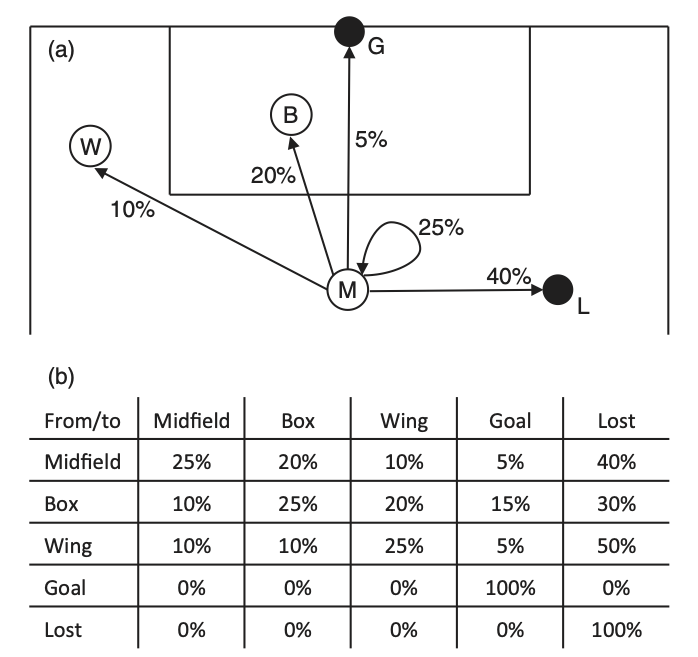

# Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
pass_matrix = np.array([[0.25, 0.2, 0.1], [0.1, 0.25, 0.2], [0.1, 0.1, 0.25]])
pass_matrix

array([[0.25, 0.2 , 0.1 ],
       [0.1 , 0.25, 0.2 ],
       [0.1 , 0.1 , 0.25]])

In [3]:
goal_vector = np.array([[0.05], [0.15], [0.05]])
goal_vector

array([[0.05],
       [0.15],
       [0.05]])

# Linear Algebra Method
Solve $(I-A)xT = g$

In [4]:
xT = np.linalg.solve(np.identity(3) - pass_matrix, goal_vector)

print("Expected Threat:")
pd.DataFrame(xT.T, columns=["Central", "Box", "Wing"])

Expected Threat:


,Central,Box,Wing
0,0.149918,0.252059,0.120264


# Iterative Method
Iteratee $xT'=A xT + g$

In [36]:
xT = np.zeros((3,1))

for t in range(10):
    xT = np.matmul(pass_matrix, xT) + goal_vector

print("Expected Threat:")
pd.DataFrame(xT.T, columns=["Central", "Box", "Wing"])

Expected Threat:
(3, 1)


,Central,Box,Wing
0,0.149669,0.251825,0.12008


# Simulation Method

In [41]:
num_sims = 100000
xT = np.zeros((3,1))
locations = {0: "Central", 1: "Wing", 2: "Box"}

for i in range(3):
    num_goals = 0

    # print('---------------')
    # print('Start from ' + locations[i] )
    # print('---------------')

    for n in range(num_sims):
        ballinplay = True
        state = i
        describe_possession=""

        while ballinplay:
            r = np.random.rand()
            describe_possession = describe_possession + ' - ' + locations[state]

            cumulative_sum = np.cumsum(pass_matrix[state,:])
            new_state = np.sum(r > cumulative_sum)

            if new_state > 2:
                ballinplay=False

                if r < (goal_vector[state] + cumulative_sum[2]):
                    num_goals = num_goals + 1
                    describe_possession = describe_possession + ' - Goal!'
                    
                else:
                    describe_possession = describe_possession + ' - Out of play'
            
            state = new_state
        
        # print(describe_possession)
    
    xT[i] = num_goals / num_sims

print("Expected Threat:")
pd.DataFrame(xT.T, columns=["Central", "Box", "Wing"])

Expected Threat:


,Central,Box,Wing
0,0.1483,0.2525,0.11912
